# 1-Perkenalan

1. Nama : Husain Tsabit Abdur Rahim

2. Batch : FTDS Hacktiv8 Batch 016 - RMT

3. Queries pada Google Cloud Platform : `SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month FROM `bigquery-public-data.ml_datasets.credit_card_default` limit 31984;`

4. Problem Statement : 
   Buatlah model Classification untuk memprediksi default_payment_next_month menggunakan dataset yang sudah kalian simpan.

4. Objective :
   - berapakah jumlah pengguna kartu kredit berdasarkan penggolongan usia?
   - berapakah jumlah pengguna kartu kredit berdasarkan penggolongan tingkatan pendidikan?
   - berapakah jumlah pengguna kartu kredit berdasarkan penggolongan jenis kelamin?

# 2-Import Libraries

In [1]:
# libraries
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#splitting data
from sklearn.model_selection import train_test_split

# feature scalling
from sklearn.preprocessing import MinMaxScaler

#evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

#feature sclaing
from sklearn.preprocessing import StandardScaler

# model definition
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

# Hyperparameter
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
#import dataset
df = pd.read_csv('/Users/husaintsabit/Downloads/h8dsft_P1M1_Husain_Tsabit.csv')
df.head() # menampilkan baris teratas dari dataset

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,3,0,50,0,0,0,-1,-1,...,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,2,3,0,45,-2,-2,-2,-2,-2,...,399,1396,0,2430,0,399,1396,0,0,0
2,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
3,230000,1,2,1,41,0,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
4,50000,1,2,1,42,0,0,0,0,0,...,31320,36227,35569,2007,2000,1500,5400,0,3000,0


In [3]:
# menampilkan baris terakhir dari dataset
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,320000,1,2,1,41,1,-2,-2,-2,-2,...,0,700,860,0,0,0,700,860,2420,1
2961,20000,1,1,1,39,-1,-1,-1,-1,-1,...,630,664,598,700,600,700,700,600,1400,0
2962,20000,1,2,2,25,0,0,0,0,0,...,16600,17025,17381,1300,1300,1300,700,630,650,0
2963,50000,1,2,2,38,0,0,0,0,0,...,17833,18246,18642,1300,1600,650,700,700,700,0
2964,100000,2,1,2,28,0,0,0,2,0,...,10775,10998,12655,1300,3005,0,700,2000,1500,0


penjelasan atribut data :

1. limit_balance : 

    Amount of given credit in NT dollars (includes individual and family/supplementary credit

2. sex : 

    Gender (1=male, 2=female)

3. education_level : 

    Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

4. marital_status : 

    Marital status (1=married, 2=single, 3=others)

5. age : 

    Age in years

6. pay_1, pay_2, pay_3, pay_4, pay_5, pay_6 :

    Repayment status in September (pay_1) -> April (pay_6), 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above).

    1 = September, 2 = August, 3 = July, 4 = June, 5 = May, 6 = April

7. bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6 :

    Amount of bill statement in September (bill_amt_1) -> April (bill_amt_6), 2005 (NT dollar).
        
    1 = September, 2 = August, 3 = July, 4 = June, 5 = May, 6 = April

8. pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6 :

    Amount of previous payment in September (pay_amt_1) -> April (pay_amt_1), 2005 (NT dollar).
   
    1 = September, 2 = August, 3 = July, 4 = June, 5 = May, 6 = April

    
9. default_payment_next_month : 

    Default payment (1=yes, 0=no)


In [4]:
# menduplikat dataset

df_copy = df.copy()

In [5]:
# melihat informasi dari dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

statement : dari informasi di atas dapat di lihat bahwa jumlah data terdiri dari 2965 Rows dan 24 Columns. Data info di atas juga menunjukkan bahwa semua kolumn bertipe numerik, terdapat column yang nilainya mewakili kategori dan ada juga yang nilainya mewakili nilai sebenarnya.

In [6]:
# melihat deskripsi data

df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


statement : dapat dilihat dari hasil di atas bahwa usia rata-rata yang mengajukan kartu kredit yaitu 35 tahun, dengan usia minimal 21 dan usia maksimal 69. Sedangkan rata-rata limit balance yang diberikan yaitu 163369 dengan nilai minimal 10000 dan nilai maksimal yaitu 800000.

In [7]:
# mengganti nama column
df = df.rename(columns={'pay_0': 'pay_1'})

# 4-Exploratory Data Analyst (EDA)

## 4.1 Mencari Data Yang Hilang

In [8]:
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_1                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

statement : dapat dilihat bahwa pada dataset ini tidak terdapat data yang hilang.

## 4.2 Mencari Besaran Limit Yang Di Berikan

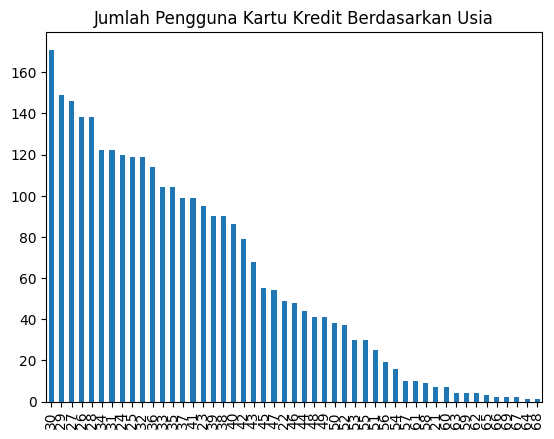

In [9]:
# Barplot dari jumlah usia

df['age'].value_counts().plot(kind='bar')
plt.title('Jumlah Pengguna Kartu Kredit Berdasarkan Usia')
plt.show()

statement : dari hasil barplot diatas dapat dilihat bahwa jumlah penggunaan kartu kredit paling banyak berusia 30 tahun dan paling sedikit yaitu 68 tahun

# 4.3 Mencari tingkat pendidikan yang paling banyak Menggunakan Kartu Kredit

In [10]:
# mencari nilai unique dari education level
df['education_level'].unique()

array([3, 1, 2, 5, 6, 4, 0])

di karenakan pada dataset ini nilai dari kategori 5, 6, 0 = unknown, maka saya akan menggabungkan kategori tersebut dengan kategori 4 = others.

In [11]:
# menggabungkan katgori
edu = (df.education_level == 5) | (df.education_level == 6) | (df.education_level == 0)
df.loc[edu, 'education_level'] = 4

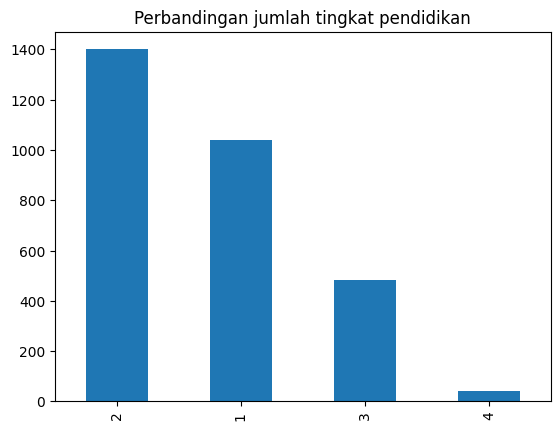

In [12]:
# barplot dari jumlah tingkat pendidikan
df['education_level'].value_counts().plot(kind='bar')
plt.title('Perbandingan jumlah tingkat pendidikan')
plt.show()

statement : berdasarkan barplot jumlah pengguna kartu kredit berdasarkan tingkatan pendidikan, pengguna kartu kredit paling banyak terdapat pada kategori 2 yaitu University dan paling rendah yaitu kategori 4 yaitu others

## 4.4 Mencari Jumlah Pengguna Berdasarkan Usia

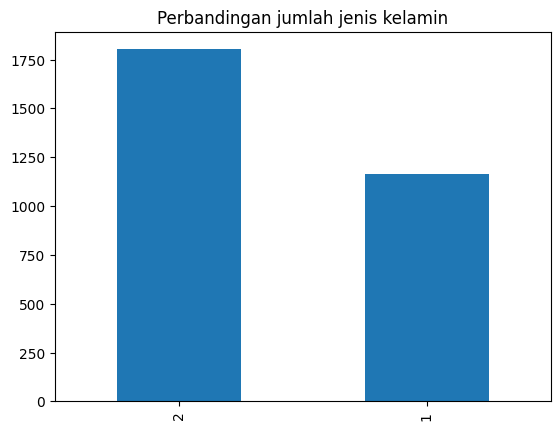

In [13]:
# barplot berdasarkan jenis kelamin
df['sex'].value_counts().plot(kind='bar')
plt.title('Perbandingan jumlah jenis kelamin')
plt.show()

statement : berdasarkan perbandingan jumlah pengguna kartu kredit berdasarkan jenis kelamin dapat dilihat bahwa kategori 2 atau female menjadi customer yang paling banyak menggunakan kartu kredit, hal ini disebabkan karena perempuan lebih suka berbelanja dibandingkan dengan laki-laki.

source : `https://journal.sociolla.com/lifestyle/5-alasan-wanita-lebih-suka-berbelanja`

# 5-Data Preprocessing

## 5.1 Handling Missing Values

Statement : Berdasarkan proses yang dilakukan pada saat EDA tidak menemukan data hilang, maka saya tidak perlu menangani proses ini.

## 5.2 Feature Selection

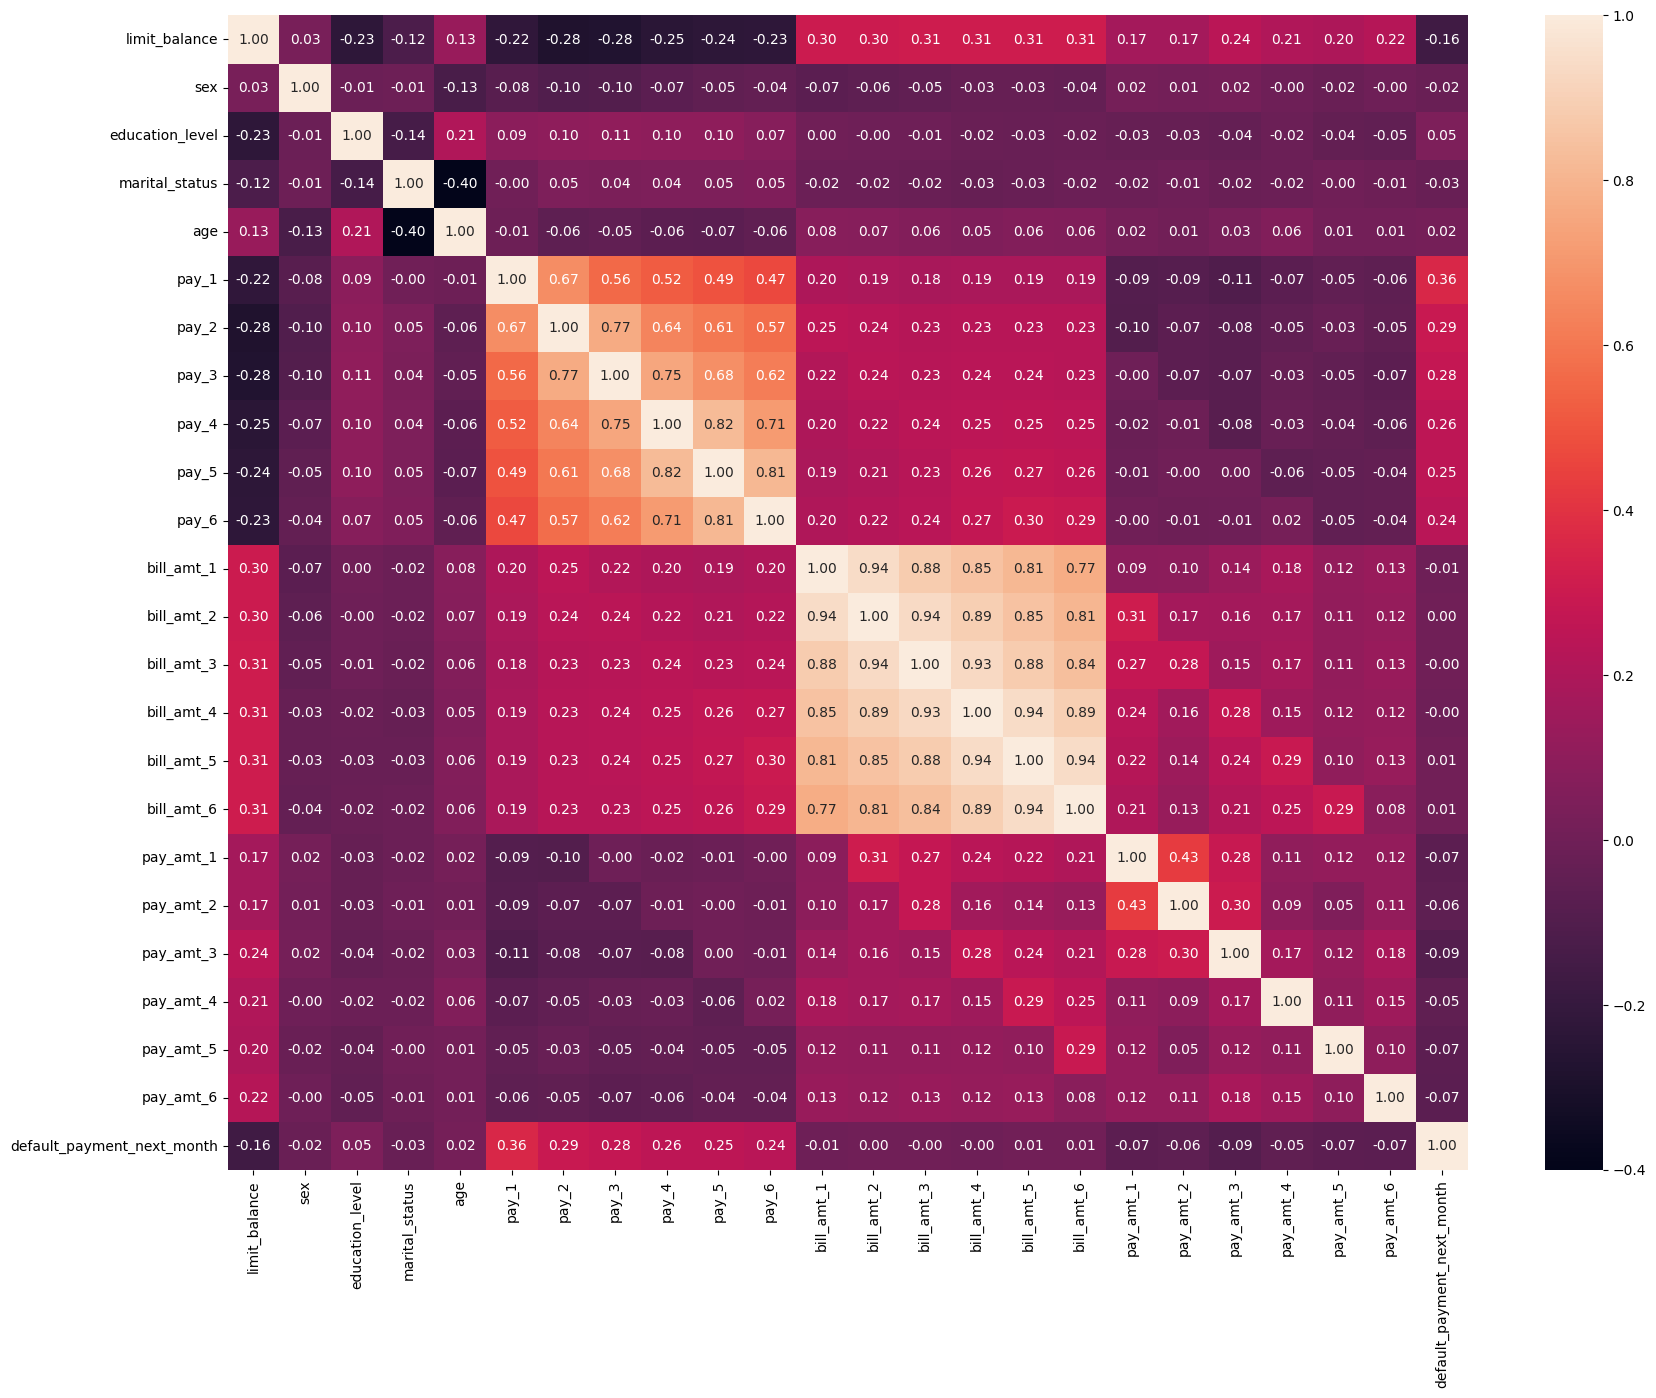

In [14]:
# Use heatmap for identifying correlation between numeric features
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

statement : dari korelasi di atas kita bisa melihat korelasi antar kolom dengan target (default_payment_next_month), walaupun status korelasi tergolong rendah, namun saya akan tetap menggunakan semua column yang ada pada dataset ini.

## 5.3 Get Data For Model Inference

In [15]:
# mengambil 10 data untuk model inference
df_inf = df.sample(10, random_state=25) 

df_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2107,130000,2,1,2,24,0,-1,-1,2,0,...,670,670,670,5555,670,0,0,0,0,0
801,350000,1,1,2,42,2,0,0,0,0,...,117867,117518,119718,12618,11127,4327,4261,4150,4153,1
820,200000,1,1,2,37,0,0,0,0,0,...,139209,135902,138997,15034,20038,20019,5014,10047,10238,0
263,290000,1,3,1,40,0,0,0,0,0,...,133904,128276,130419,7800,7549,10000,15000,5000,0,0
81,50000,1,3,1,55,2,0,0,0,0,...,43360,40555,31309,2200,1632,1113,1336,3142,2126,1
2561,30000,2,3,2,48,-1,-1,-1,-1,-1,...,390,390,0,0,390,390,390,0,780,1
414,150000,1,3,1,52,2,2,2,2,2,...,47214,144862,148153,13312,2305,0,98828,4241,3625,1
2827,280000,1,2,2,47,0,0,0,0,0,...,180598,20596,15311,20213,8003,9002,5000,5000,5000,0
1661,260000,2,2,1,43,2,2,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1
2724,140000,2,2,1,26,0,0,0,0,0,...,21711,25999,902,7023,5080,10000,6000,902,18542,0


In [16]:
# menghapus data inference dari dataset

df_train_test = df.drop(df_inf.index)
df_train_test

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,3,0,50,0,0,0,-1,-1,...,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,2,3,0,45,-2,-2,-2,-2,-2,...,399,1396,0,2430,0,399,1396,0,0,0
2,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
3,230000,1,2,1,41,0,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
4,50000,1,2,1,42,0,0,0,0,0,...,31320,36227,35569,2007,2000,1500,5400,0,3000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,320000,1,2,1,41,1,-2,-2,-2,-2,...,0,700,860,0,0,0,700,860,2420,1
2961,20000,1,1,1,39,-1,-1,-1,-1,-1,...,630,664,598,700,600,700,700,600,1400,0
2962,20000,1,2,2,25,0,0,0,0,0,...,16600,17025,17381,1300,1300,1300,700,630,650,0
2963,50000,1,2,2,38,0,0,0,0,0,...,17833,18246,18642,1300,1600,650,700,700,700,0


In [17]:
# melakukan reset index

df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000,2,1,2,24,0,-1,-1,2,0,...,670,670,670,5555,670,0,0,0,0,0
1,350000,1,1,2,42,2,0,0,0,0,...,117867,117518,119718,12618,11127,4327,4261,4150,4153,1
2,200000,1,1,2,37,0,0,0,0,0,...,139209,135902,138997,15034,20038,20019,5014,10047,10238,0
3,290000,1,3,1,40,0,0,0,0,0,...,133904,128276,130419,7800,7549,10000,15000,5000,0,0
4,50000,1,3,1,55,2,0,0,0,0,...,43360,40555,31309,2200,1632,1113,1336,3142,2126,1
5,30000,2,3,2,48,-1,-1,-1,-1,-1,...,390,390,0,0,390,390,390,0,780,1
6,150000,1,3,1,52,2,2,2,2,2,...,47214,144862,148153,13312,2305,0,98828,4241,3625,1
7,280000,1,2,2,47,0,0,0,0,0,...,180598,20596,15311,20213,8003,9002,5000,5000,5000,0
8,260000,2,2,1,43,2,2,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1
9,140000,2,2,1,26,0,0,0,0,0,...,21711,25999,902,7023,5080,10000,6000,902,18542,0


## 5.4 Memisahkan antara atribut (X) dan Target (y)

In [18]:
#Splitting dataset X (feature) dan y (target)

X = df.drop('default_payment_next_month', axis = 1)
y = df['default_payment_next_month']

## 5.5 Memisahkan antara data train dan data test

In [19]:
#Splitting dataset menjadi 80% untuk train dan 20% untuk test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# melihat shape dari train-set dan test-set
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (2372, 23)
Test Size :  (593, 23)


statement : dapat di lihat bahwa data train berisi dari 2372 rows dan 23 columns, sedangkan data test terdiri dari 593 rows dan 23 dolumns.

## 5.6 Handling Outlier

In [20]:
# Membuat fungsi untuk membuat histogram dan boxplot bagi data
def hist_boxplot(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

    print('skewness:', df[variable].skew())
    if (df[variable].skew() <= -0.5 ) | (df[variable].skew() >= 0.5 ) :
      print('the distribution is skewed')
    else:
      print('the distribution is normal')

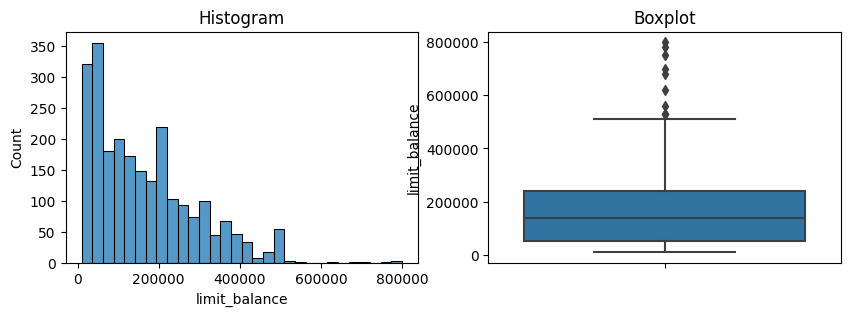

skewness: 1.0192184660579198
the distribution is skewed


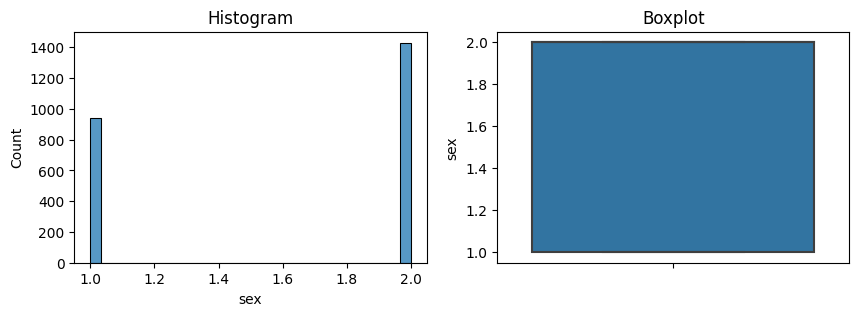

skewness: -0.42072771843220824
the distribution is normal


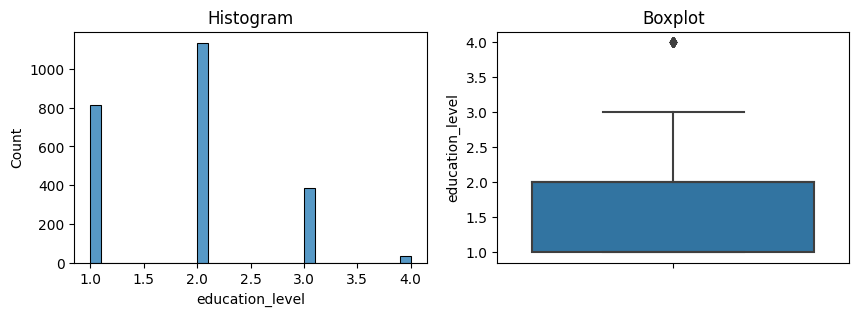

skewness: 0.46740783614717707
the distribution is normal


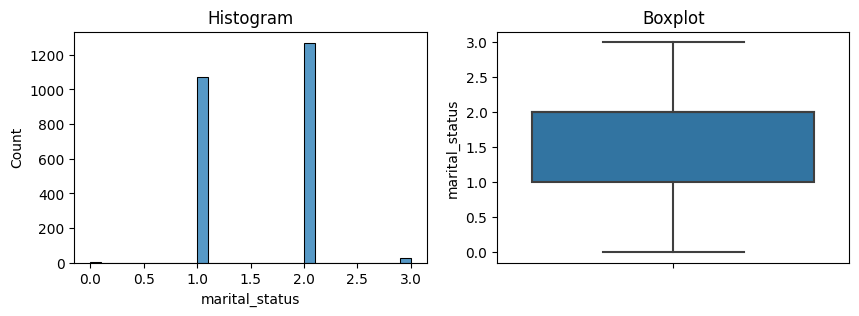

skewness: -0.02898925825795039
the distribution is normal


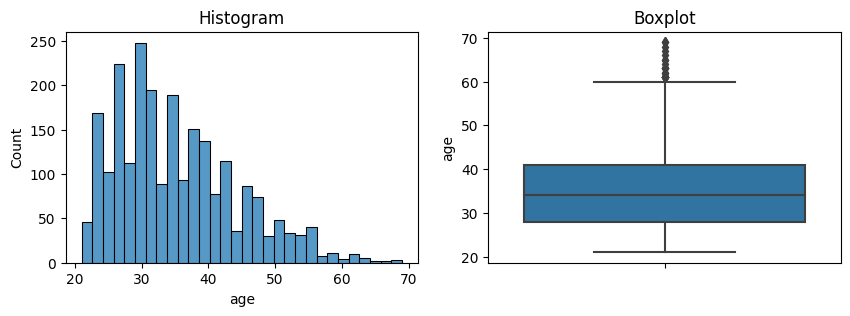

skewness: 0.7772585580543842
the distribution is skewed


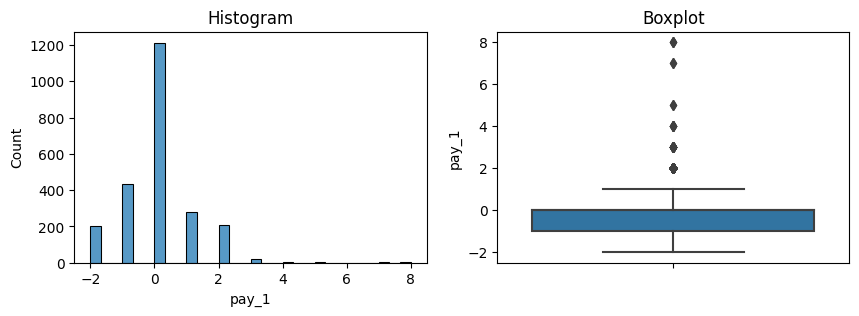

skewness: 1.000859530739005
the distribution is skewed


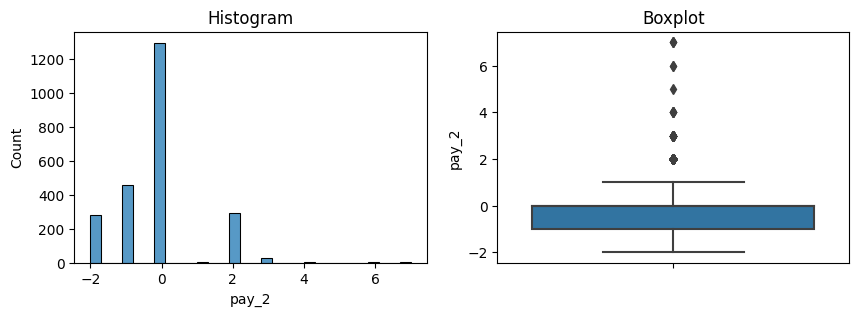

skewness: 0.8992423442380385
the distribution is skewed


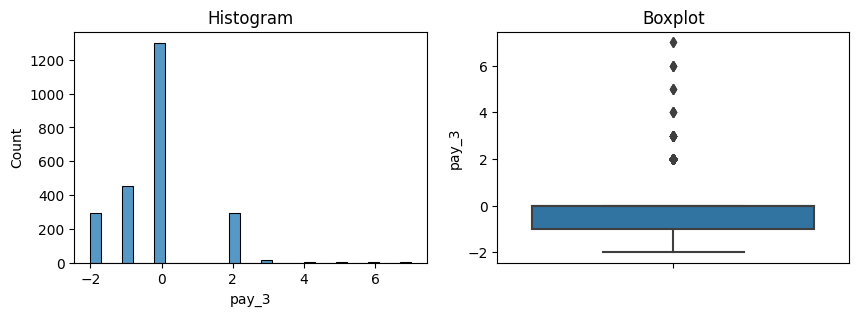

skewness: 0.924608018959383
the distribution is skewed


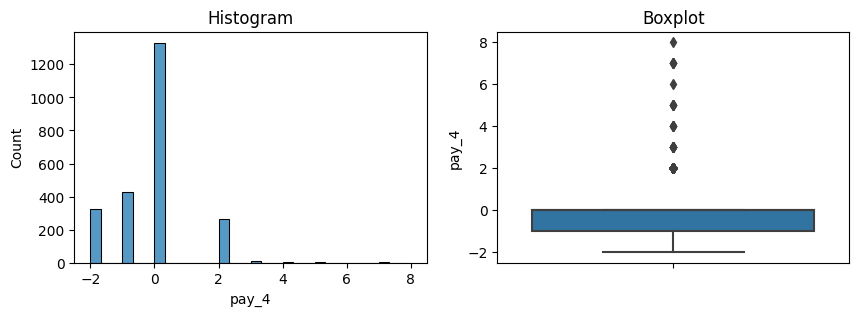

skewness: 1.147998460431569
the distribution is skewed


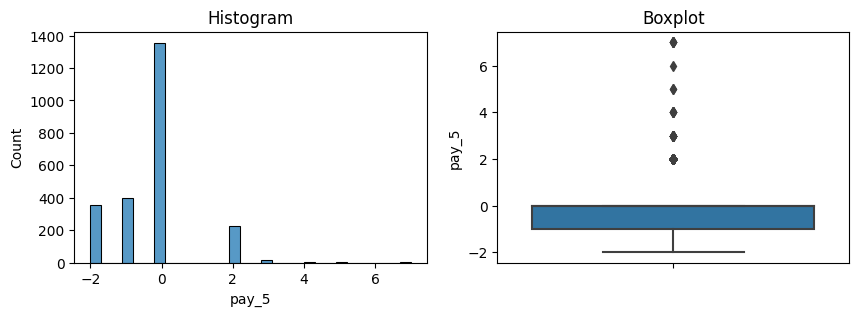

skewness: 1.0838591298945768
the distribution is skewed


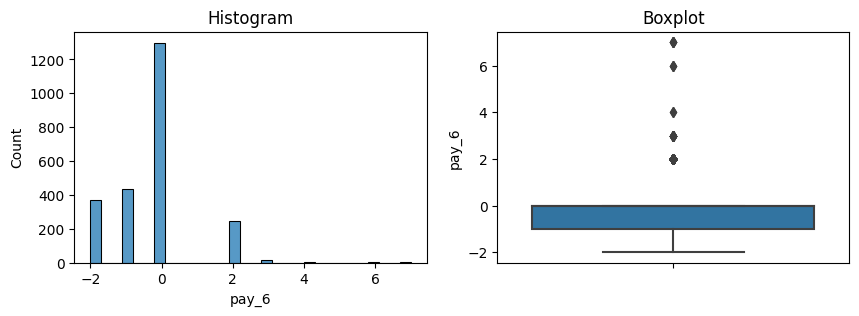

skewness: 1.0099197459546563
the distribution is skewed


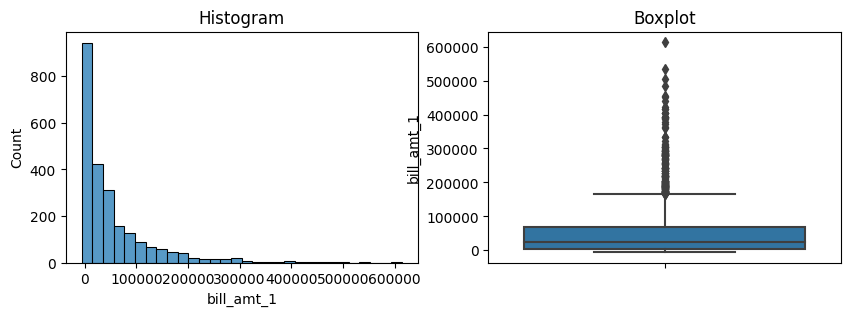

skewness: 2.495160427631668
the distribution is skewed


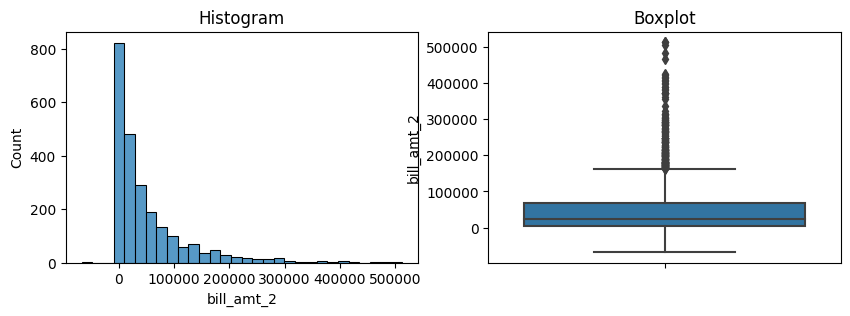

skewness: 2.4683887013965844
the distribution is skewed


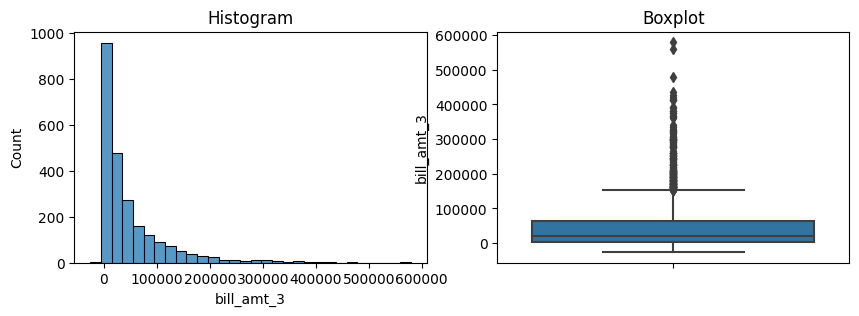

skewness: 2.6067619284339445
the distribution is skewed


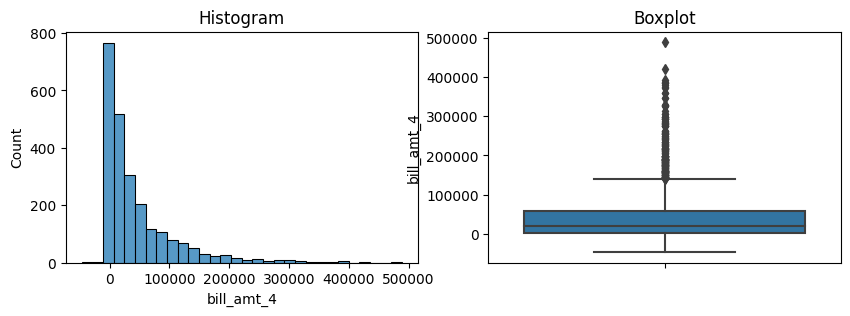

skewness: 2.4449062890558495
the distribution is skewed


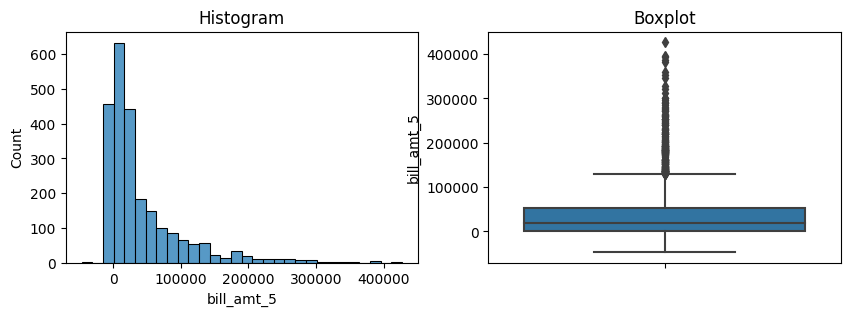

skewness: 2.393450937100253
the distribution is skewed


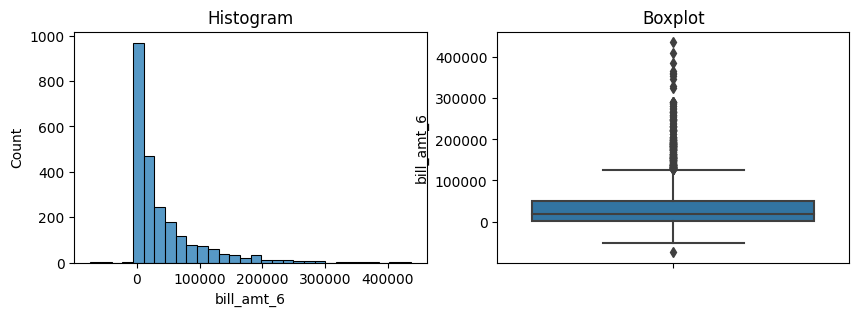

skewness: 2.4008668680513403
the distribution is skewed


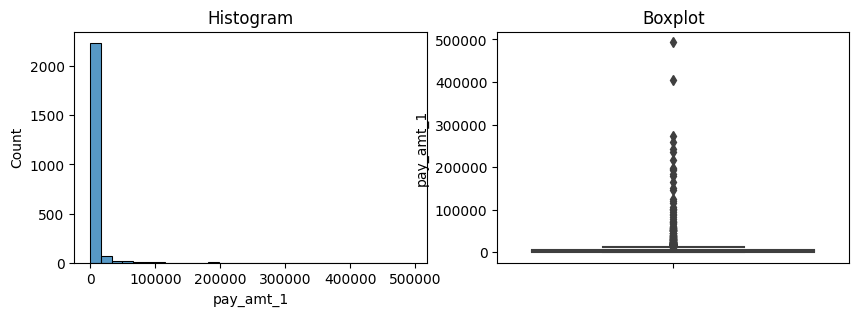

skewness: 11.631311712375062
the distribution is skewed


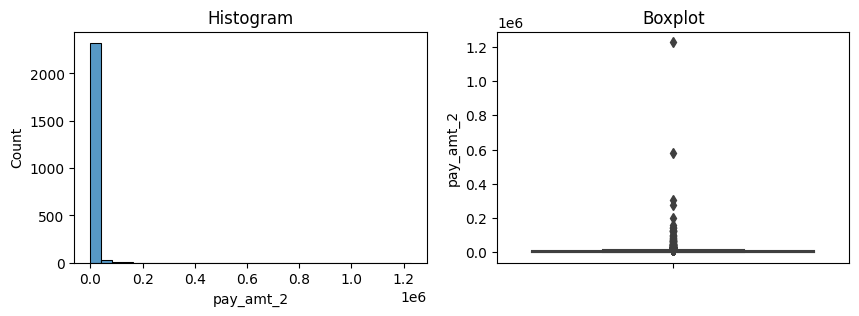

skewness: 27.39474717454063
the distribution is skewed


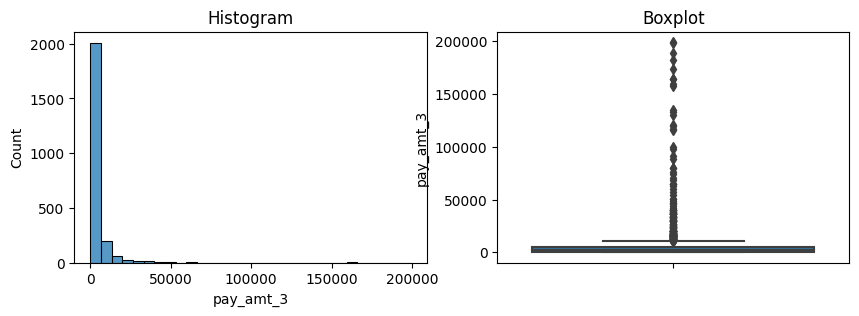

skewness: 8.045341462088366
the distribution is skewed


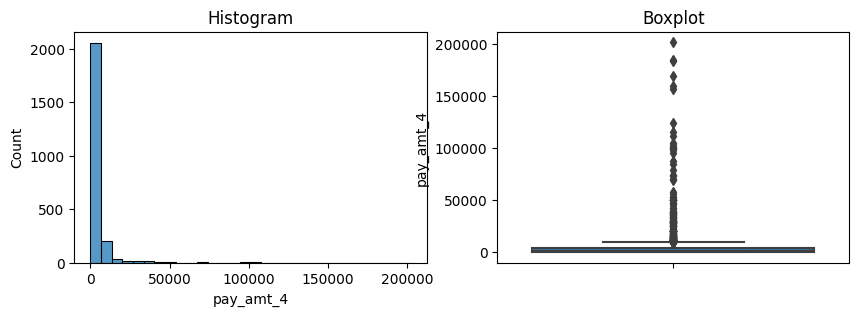

skewness: 8.504717826267425
the distribution is skewed


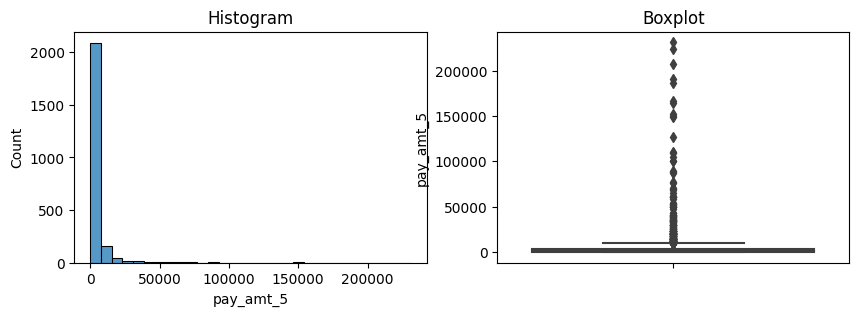

skewness: 8.883867413566165
the distribution is skewed


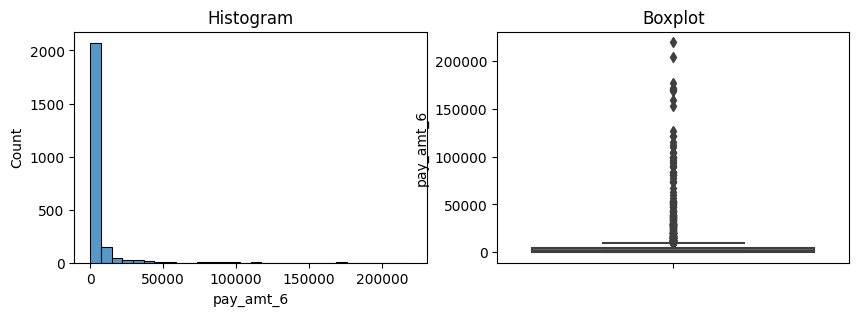

skewness: 7.273089843174636
the distribution is skewed


In [21]:
# munculkan histogram dan boxplot bagi seluruh feature
for i in X :
    hist_boxplot(X_train, i)

statement : dari hasil pengecekan diatas dapat dilihat bahwa mayoritas data terdapat skewed dan memiliki outlier, namun data yang memiliki outlier pada dataset ini dianggap sebagai natural outlier sehingga tidak perlu penanganan kepada outlier.

## 5.7 Feature Scaling

In [22]:
scaler = StandardScaler() #memanggil feature scaler
scaler.fit(X_train)

StandardScaler()

In [23]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.58444348,  0.81162877,  0.20482037, ..., -0.25547739,
        -0.32360796, -0.29840385],
       [ 0.05216748, -1.23209038,  0.20482037, ..., -0.09449424,
        -0.32360796, -0.13946493],
       [-0.74359622,  0.81162877,  1.56189838, ..., -0.1156881 ,
        -0.12577279, -0.14706311],
       ...,
       [ 2.67818769,  0.81162877,  0.20482037, ...,  0.18493404,
        -0.02500874,  1.03756746],
       [ 1.72327125,  0.81162877,  0.20482037, ...,  0.44797841,
         0.17097996,  0.13350893],
       [-0.50486711, -1.23209038,  1.56189838, ..., -0.25690535,
         3.70345875, -0.19626442]])

# 6 - Model Machine Learning

## 6.1 Model Logistic Regression

### 6.1.1 Model Definition

In [24]:
# membentuk model dari logistic regression
model_logreg = LogisticRegression() 

### 6.1.2 Model Training

In [25]:
#melatih model logistic regression

model_logreg.fit(X_train, y_train) 

LogisticRegression()

### 6.1.3 Model Prediction

In [26]:
# LogReg Model Prediction train set and test set

y_pred_train_logreg = model_logreg.predict(X_train)
y_pred_test_logreg = model_logreg.predict(X_test)
y_pred_train_logreg

array([0, 0, 0, ..., 0, 0, 0])

### 6.1.4 Model Evaluation

In [27]:
# hasil matrix data train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_logreg))

# hasil matrix data test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_logreg))

Hasil prediksi train-set
[[1852    3]
 [ 511    6]]

 Hasil prediksi test-set
[[474   1]
 [118   0]]


statement : 

Dari hasil confusion matrix dapat dilihat bahwa data yang train yang diklasifikan secara benar ada 1852+6/2372 = 0.78 dari 1 dan yang masih diklasifikan salah ada 515+3/2372 = 0.22 dari 1. Oleh karena itu nilai klasifikasi yang benar menunjukkan seberapa akurat model dalam klasifikasi, untuk data train adalah 78%.

sedangkan untuk data test yang diklasifikan secara benar ada 474 + 0/593 = 0.80 dari 1 dan yang masih diklasifikan salah ada 118+1/593 = 0.20 dari 1. Oleh karena itu nilai klasifikasi yang benar menunjukkan seberapa akurat model dalam klasifikasi, untuk data test adalah 80%.

In [28]:
# hasil classification report data train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_logreg))

# hasil classification report data test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_logreg))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1855
           1       0.67      0.01      0.02       517

    accuracy                           0.78      2372
   macro avg       0.73      0.50      0.45      2372
weighted avg       0.76      0.78      0.69      2372


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       475
           1       0.00      0.00      0.00       118

    accuracy                           0.80       593
   macro avg       0.40      0.50      0.44       593
weighted avg       0.64      0.80      0.71       593



statement : 

Dari clasification report hasil akurasi yang diperoleh dari train (78%) dan test (80%), walaupun masih memiliki perbedaan 2% model masih tergolong goodfit karena persentase score nya cukup tinggi dan perbedaan antara data train dan data test tidak signifikan. Untuk hasil f1-score untuk label 0 nilai yang diperoleh cukup baik karena data cukup banyak sedangkan untuk label 1 nilainya masih jelek karena datanya yang sedikit. Tetapi secara f1-score weighted avg nilainya sudah cukup baik.

Berasarkan nilai f1-score data train untuk klasifikasi label 0 hasilnya mencapai 88% sedangkan label 1 hanya 0.20% hal ini mungkin disebabkan karena data dari label 1 sedikit jadi model masih kurang belajar ataupun data kategorinya sedikit. Sama halnya dengan data test, untuk label 0 memiliki hasil yang baik mancapi 89% tetapi untuk label 1 hasilnya hanya 0%. F1-score digunakan karena nilai ini menunjukkan perbandingan rata-rata dari precision dan recall yang dibobotkan.

## 6.2 Model SVM

### 6.2.1 Model Definition

In [29]:
# membentuk model SVM
model_svm = SVC (random_state=0)

### 6.2.2 Model Training

In [30]:
# menlatih model SVM
model_svm.fit(X_train, y_train) 

SVC(random_state=0)

### 6.2.3 Model Prediction

In [31]:
# SVM Model Prediction train set and test set
y_pred_train_svm = model_svm.predict(X_train)
y_pred_test_svm = model_svm.predict(X_test)

### 6.2.4 Model Evaluation

In [32]:
# hasiil train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_svm))

# hasiil test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_svm))

Hasil prediksi train-set
[[1855    0]
 [ 515    2]]

 Hasil prediksi test-set
[[475   0]
 [118   0]]


statement : 

Dari hasil confusion matrix dapat dilihat bahwa data yang train yang diklasifikan secara benar ada 1855+2/2372 = 0.78 dari 1 dan yang masih diklasifikan salah ada 515+0/2372 = 0.22 dari 1. Oleh karena itu nilai klasifikasi yang benar menunjukkan seberapa akurat model dalam klasifikasi, untuk data train adalah 78%.

sedangkan untuk data test yang diklasifikan secara benar ada 475 + 0/593 = 0.80 dari 1 dan yang masih diklasifikan salah ada 118+0/593 = 0.20 dari 1. Oleh karena itu nilai klasifikasi yang benar menunjukkan seberapa akurat model dalam klasifikasi, untuk data test adalah 80%.

In [33]:
# hasil classification report data train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_svm))

# hasil classification report data test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_svm))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1855
           1       1.00      0.00      0.01       517

    accuracy                           0.78      2372
   macro avg       0.89      0.50      0.44      2372
weighted avg       0.83      0.78      0.69      2372


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       475
           1       0.00      0.00      0.00       118

    accuracy                           0.80       593
   macro avg       0.40      0.50      0.44       593
weighted avg       0.64      0.80      0.71       593



statement : 

Dari clasification report hasil akurasi yang diperoleh dari train (78%) dan test (80%), walaupun masih memiliki perbedaan 2% model masih tergolong goodfit karena persentase score nya cukup tinggi dan perbedaan antara data train dan data test tidak signifikan. Untuk hasil f1-score untuk label 0 nilai yang diperoleh cukup baik karena data cukup banyak sedangkan untuk label 1 nilainya masih jelek karena datanya yang sedikit. Tetapi secara f1-score weighted avg nilainya sudah cukup baik.

Berasarkan nilai f1-score data train untuk klasifikasi label 0 hasilnya mencapai 88% sedangkan label 1 hanya 0.20% hal ini mungkin disebabkan karena data dari label 1 sedikit jadi model masih kurang belajar ataupun data kategorinya sedikit. Sama halnya dengan data test, untuk label 0 memiliki hasil yang baik mancapi 89% tetapi untuk label 1 hasilnya hanya 0%. F1-score digunakan karena nilai ini menunjukkan perbandingan rata-rata dari precision dan recall yang dibobotkan.

## 6.3 Model Decision Tree

### 6.3.1 Model Definition

In [34]:
# mendefinisikan model decision tree
model_dt = DecisionTreeClassifier()

### 6.3.2 Model Training

In [35]:
# mentraining model
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

### 6.3.3 Model Prediction

In [36]:
# SVM Model Prediction train set and test set
y_pred_train_dt = model_dt.predict(X_train)
y_pred_test_dt = model_dt.predict(X_test)

### 6.3.4 Model Evaluation

In [37]:
# hasil train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_dt))

# hasil test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_dt))

Hasil prediksi train-set
[[1855    0]
 [   0  517]]

 Hasil prediksi test-set
[[393  82]
 [ 63  55]]


statement : 

Dari hasil confusion matrix dapat dilihat bahwa data yang train yang diklasifikan secara benar ada 1855+517/2372 = 1 dari 1 dan tidak ada yang diklasifikan salah. Oleh karena itu nilai klasifikasi yang benar menunjukkan seberapa akurat model dalam klasifikasi, untuk data train adalah 100%.

sedangkan untuk data test yang diklasifikan secara benar ada 392 + 50/593 = 0.75 dari 1 dan yang masih diklasifikan salah ada 68+83/593 = 0.25 dari 1. Oleh karena itu nilai klasifikasi yang benar menunjukkan seberapa akurat model dalam klasifikasi, untuk data test adalah 75%.

In [38]:
# hasil classification report data train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_dt))

# hasil classification report data test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_dt))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1855
           1       1.00      1.00      1.00       517

    accuracy                           1.00      2372
   macro avg       1.00      1.00      1.00      2372
weighted avg       1.00      1.00      1.00      2372


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       475
           1       0.40      0.47      0.43       118

    accuracy                           0.76       593
   macro avg       0.63      0.65      0.64       593
weighted avg       0.77      0.76      0.76       593



statement : 

Dari clasification report hasil akurasi yang diperoleh dari train (100%) dan test (75%), dengan memiliki perbedaan 25% model tergolong underfit karena persentase perbedaan antara data train dan data test cukup tinggi. Untuk hasil f1-score untuk label 0 nilai yang diperoleh cukup baik karena data cukup banyak sedangkan untuk label 1 nilainya masih jelek karena datanya yang sedikit. Tetapi secara f1-score weighted avg nilainya sudah cukup baik.

Berasarkan nilai f1-score data train untuk klasifikasi label 0 hasilnya mencapai 100% sedangkan label 1 100%. Namun untuk data test, label 0 memiliki hasil yang baik mancapi 84% tetapi untuk label 1 hasilnya hanya 40%.

## 6.4 Model Random Forest

### 6.4.1 Model Definition

In [39]:
# mendefinisikan model random forest
model_rf = RandomForestClassifier()

### 6.4.2 Model Training

In [40]:
# mentraining model
model_rf.fit(X_train, y_train)

RandomForestClassifier()

### 6.4.3 Model Prediction

In [41]:
# SVM Model Prediction train set and test set
y_pred_train_rf = model_rf.predict(X_train)
y_pred_test_rf = model_rf.predict(X_test)

### 6.4.4 Model Evaluation

In [42]:
# hasiil train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_rf))

# hasiil test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_rf))

Hasil prediksi train-set
[[1855    0]
 [   0  517]]

 Hasil prediksi test-set
[[446  29]
 [ 70  48]]


statement : 

Dari hasil confusion matrix dapat dilihat bahwa data yang train yang diklasifikan secara benar ada 1855+517/2372 = 1.00 dari 1 dan tidak ada yang diklasifikasikan salah. Oleh karena itu nilai klasifikasi yang benar menunjukkan seberapa akurat model dalam klasifikasi, untuk data train adalah 100%.

sedangkan untuk data test yang diklasifikan secara benar ada 446 + 29/593 = 0.83 dari 1 dan yang masih diklasifikan salah ada 69+29/593 = 0.17 dari 1. Oleh karena itu nilai klasifikasi yang benar menunjukkan seberapa akurat model dalam klasifikasi, untuk data test adalah 83%.

In [43]:
# hasil classification report data train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_rf))

# hasil classification report data test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_rf))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1855
           1       1.00      1.00      1.00       517

    accuracy                           1.00      2372
   macro avg       1.00      1.00      1.00      2372
weighted avg       1.00      1.00      1.00      2372


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       475
           1       0.62      0.41      0.49       118

    accuracy                           0.83       593
   macro avg       0.74      0.67      0.70       593
weighted avg       0.82      0.83      0.82       593



statement : 

Dari clasification report hasil akurasi yang diperoleh dari train (100%) dan test (83%), dengan perbedaan 17% maka model tergolong underfit karena persentase score nya cukup tinggi dan perbedaan antara data train dan data test signifikan. Untuk hasil f1-score untuk label 0 nilai yang diperoleh cukup baik karena data cukup banyak sedangkan untuk label 1 nilainya masih jelek.

Berasarkan nilai f1-score data train untuk klasifikasi label 0 hasilnya mencapai 100% sedangkan label 1 hanya 100% hal ini mungkin disebabkan karena data dari label 1 sedikit jadi model masih kurang belajar ataupun data kategorinya sedikit. Sama halnya dengan data test, untuk label 0 memiliki hasil yang baik mancapi 90% tetapi untuk label 1 hasilnya hanya 50%. 

## 6.5 Model KNN

### 6.5.1 Model Definition

In [44]:
# mendefinisikan model KNN
model_knn = KNeighborsClassifier()

### 6.5.2 Model Training

In [45]:
# mentraining model
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

### 6.5.3 Model Prediction

In [46]:
# SVM Model Prediction train set and test set
y_pred_train_knn = model_knn.predict(X_train)
y_pred_test_knn = model_knn.predict(X_test)

### 6.5.4 Model Evaluation

In [47]:
# hasiil train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_knn))

# hasiil test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_knn))

Hasil prediksi train-set
[[1766   89]
 [ 328  189]]

 Hasil prediksi test-set
[[430  45]
 [ 99  19]]


statement : 

Dari hasil confusion matrix dapat dilihat bahwa data yang train yang diklasifikan secara benar ada 1766+189/2372 = 0.82 dari 1 dan yang masih diklasifikan salah ada 328+89/2372 = 0.18 dari 1. Oleh karena itu nilai klasifikasi yang benar menunjukkan seberapa akurat model dalam klasifikasi, untuk data train adalah 82%.

sedangkan untuk data test yang diklasifikan secara benar ada 430 + 19/593 = 0.76 dari 1 dan yang masih diklasifikan salah ada 99+45/593 = 0.24 dari 1. Oleh karena itu nilai klasifikasi yang benar menunjukkan seberapa akurat model dalam klasifikasi, untuk data test adalah 80%.

In [48]:
# hasil classification report data train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_knn))

# hasil classification report data test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_knn))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1855
           1       0.68      0.37      0.48       517

    accuracy                           0.82      2372
   macro avg       0.76      0.66      0.68      2372
weighted avg       0.81      0.82      0.80      2372


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       475
           1       0.30      0.16      0.21       118

    accuracy                           0.76       593
   macro avg       0.55      0.53      0.53       593
weighted avg       0.71      0.76      0.73       593



statement : 

Dari clasification report hasil akurasi yang diperoleh dari train (82%) dan test (76%), memiliki perbedaan 6% model tergolong underfit karena persentase score nya cukup tinggi dan perbedaan antara data train dan data test signifikan. Untuk hasil f1-score untuk label 0 nilai yang diperoleh cukup baik karena data cukup banyak sedangkan untuk label 1 nilainya masih jelek karena datanya yang sedikit. Tetapi secara f1-score weighted avg nilainya sudah cukup baik.

Berasarkan nilai f1-score data train untuk klasifikasi label 0 hasilnya mencapai 89% sedangkan label 1 hanya 0.48% hal ini mungkin disebabkan karena data dari label 1 sedikit jadi model masih kurang belajar ataupun data kategorinya sedikit. Sama halnya dengan data test, untuk label 0 memiliki hasil yang baik mancapi 86% tetapi untuk label 1 hasilnya hanya 21%.

## 6.6 Model Naive Bayes

### 6.6.1 Model Definition

In [49]:
# definisikan model baive bayes
model_nb = GaussianNB()

### 6.6.2 Model Training

In [50]:
# mentraining model
model_nb.fit(X_train, y_train)

GaussianNB()

### 6.6.3 Model Prediction

In [51]:
# SVM Model Prediction train set and test set
y_pred_train_nb = model_nb.predict(X_train)
y_pred_test_nb = model_nb.predict(X_test)

### 6.6.4 Model Evaluation

In [52]:
# hasiil train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_nb))

# hasiil test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_nb))

Hasil prediksi train-set
[[ 377 1478]
 [  36  481]]

 Hasil prediksi test-set
[[ 90 385]
 [ 13 105]]


statement : 

Dari hasil confusion matrix dapat dilihat bahwa data yang train yang diklasifikan secara benar ada 377+481/2372 = 0.36 dari 1 dan yang masih diklasifikan salah ada 36+1478/2372 = 0.64 dari 1. Oleh karena itu nilai klasifikasi yang benar menunjukkan seberapa akurat model dalam klasifikasi, untuk data train adalah 36%.

sedangkan untuk data test yang diklasifikan secara benar ada 90 + 105/593 = 0.33 dari 1 dan yang masih diklasifikan salah ada 385+13/593 = 0.67 dari 1. Oleh karena itu nilai klasifikasi yang benar menunjukkan seberapa akurat model dalam klasifikasi, untuk data test adalah 80%.

In [53]:
# hasil classification report data train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_nb))

# hasil classification report data test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_nb))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.91      0.20      0.33      1855
           1       0.25      0.93      0.39       517

    accuracy                           0.36      2372
   macro avg       0.58      0.57      0.36      2372
weighted avg       0.77      0.36      0.34      2372


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.87      0.19      0.31       475
           1       0.21      0.89      0.35       118

    accuracy                           0.33       593
   macro avg       0.54      0.54      0.33       593
weighted avg       0.74      0.33      0.32       593



statement : 

Dari clasification report hasil akurasi yang diperoleh dari train (36%) dan test (33%), walaupun masih memiliki perbedaan 3% model tetap tergolong underfit karena persentase score nya yang rendah. Untuk hasil f1-score untuk label 0 dan label 1 memiliki f1-score yang rendah.

Berasarkan nilai f1-score data train untuk klasifikasi label 0 hasilnya mencapai 33% sedangkan label 1 hanya 39%. Sama halnya dengan data test, untuk label 0 memiliki hasil yang jelek dengan f1-score hanya 31% dan label 1 hasilnya hanya 35%.

## 6.7 Model Adaboost

### 6.7.1 Model Definiition

In [54]:
# definisikan model
model_ada = AdaBoostClassifier()

### 6.7.2 Model Training

In [55]:
# mentraining model
model_ada.fit(X_train, y_train)

AdaBoostClassifier()

### 6.7.3 Model Prediction

In [56]:
# SVM Model Prediction train set and test set
y_pred_train_ada = model_ada.predict(X_train)
y_pred_test_ada = model_ada.predict(X_test)

### 6.7.4 Model Evaluation

In [57]:
# hasiil train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_ada))

# hasiil test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_ada))

Hasil prediksi train-set
[[1791   64]
 [ 310  207]]

 Hasil prediksi test-set
[[452  23]
 [ 70  48]]


statement : 

Dari hasil confusion matrix dapat dilihat bahwa data yang train yang diklasifikan secara benar ada 1791+207/2372 = 0.84 dari 1 dan yang masih diklasifikan salah ada 310+64/2372 = 0.16 dari 1. Oleh karena itu nilai klasifikasi yang benar menunjukkan seberapa akurat model dalam klasifikasi, untuk data train adalah 84%.

sedangkan untuk data test yang diklasifikan secara benar ada 452+48/593 = 0.84 dari 1 dan yang masih diklasifikan salah ada 385+13/593 = 0.16 dari 1. Oleh karena itu nilai klasifikasi yang benar menunjukkan seberapa akurat model dalam klasifikasi, untuk data test adalah 84%.

In [58]:
# hasil classification report data train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_ada))

# hasil classification report data test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_ada))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1855
           1       0.76      0.40      0.53       517

    accuracy                           0.84      2372
   macro avg       0.81      0.68      0.72      2372
weighted avg       0.83      0.84      0.82      2372


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       475
           1       0.68      0.41      0.51       118

    accuracy                           0.84       593
   macro avg       0.77      0.68      0.71       593
weighted avg       0.83      0.84      0.83       593



statement : 

Dari clasification report hasil akurasi yang diperoleh dari train (84%) dan test (84%), karena hasil untuk train dan test sama dan score termasuk tinggi maka model tergolong goodfiting, Untuk hasil f1-score untuk label 0 tinggi namun untuk label 1 memiliki f1-score yang rendah.

Berasarkan nilai f1-score data train untuk klasifikasi label 0 hasilnya mencapai 91% sedangkan label 1 hanya 53%. Sama halnya dengan data test, untuk label 0 memiliki hasil yang jelek dengan f1-score hanya 91% dan label 1 hasilnya hanya 51%.

# 7 - Finding Best Model

In [59]:
# melakukan validasi model sebanyak 5 kali
k_fold = KFold(n_splits=5)

# cross validation tiap model
score_logreg = cross_val_score(model_logreg, X_train, y_train, cv=k_fold)
score_svm = cross_val_score(model_svm, X_train, y_train, cv=k_fold)
score_dt = cross_val_score(model_dt, X_train, y_train, cv=k_fold)
score_rf = cross_val_score(model_rf, X_train, y_train, cv=k_fold)
score_knn = cross_val_score(model_knn, X_train, y_train, cv=k_fold)
score_nb = cross_val_score(model_nb, X_train, y_train, cv=k_fold)
score_ada = cross_val_score(model_ada, X_train, y_train, cv=k_fold)


In [60]:
# menampilkan hasil validasi tiap model
print("Score 5 Cross Validation Logistic Regression {}".format(score_logreg))
print("Score 5 Cross Validation SVM {}".format(score_svm))
print("Score 5 Cross Validation Decision Tree {}".format(score_dt))
print("Score 5 Cross Validation Random Forest {}".format(score_rf))
print("Score 5 Cross Validation KNN {}".format(score_knn))
print("Score 5 Cross Validation Naive Bayes {}".format(score_nb))
print("Score 5 Cross Validation Adaboost {}".format(score_ada))

Score 5 Cross Validation Logistic Regression [0.75578947 0.80210526 0.77004219 0.76160338 0.81434599]
Score 5 Cross Validation SVM [0.75157895 0.80631579 0.77004219 0.76582278 0.81434599]
Score 5 Cross Validation Decision Tree [0.71368421 0.73263158 0.75316456 0.74683544 0.7257384 ]
Score 5 Cross Validation Random Forest [0.78947368 0.85263158 0.80801688 0.8164557  0.84810127]
Score 5 Cross Validation KNN [0.72421053 0.75368421 0.72995781 0.76160338 0.78270042]
Score 5 Cross Validation Naive Bayes [0.38105263 0.34315789 0.35654008 0.35864979 0.35021097]
Score 5 Cross Validation Adaboost [0.79789474 0.83578947 0.81434599 0.82911392 0.85232068]


In [61]:
# menampilkan rata-rata tiap model
print("rata-rata Cross Validation score logistic regression :{}".format(score_logreg.mean()))
print("rata-rata Cross Validation score SVM :{}".format(score_svm.mean()))
print("rata-rata Cross Validation score Decision Tree :{}".format(score_dt.mean()))
print("rata-rata Cross Validation score Random Forest :{}".format(score_rf.mean()))
print("rata-rata Cross Validation score KNN :{}".format(score_knn.mean()))
print("rata-rata Cross Validation score Naive Bayes :{}".format(score_nb.mean()))
print("rata-rata Cross Validation score Adaboost :{}".format(score_ada.mean()))

rata-rata Cross Validation score logistic regression :0.7807772596047079
rata-rata Cross Validation score SVM :0.7816211414612481
rata-rata Cross Validation score Decision Tree :0.7344108372196314
rata-rata Cross Validation score Random Forest :0.8229358205640684
rata-rata Cross Validation score KNN :0.7504312680435266
rata-rata Cross Validation score Naive Bayes :0.3579222740395292
rata-rata Cross Validation score Adaboost :0.825892960248723


In [62]:
# menampilkan standar deviasi tiap model
print("Standar deviasi Cross Validation score logistic regression :{}".format(score_logreg.std()))
print("Standar deviasi Cross Validation score SVM :{}".format(score_svm.std()))
print("Standar deviasi Cross Validation score Decision Tree :{}".format(score_dt.std()))
print("Standar deviasi Cross Validation score Random Forest :{}".format(score_rf.std()))
print("Standar deviasi Cross Validation score KNN :{}".format(score_knn.std()))
print("Standar deviasi Cross Validation score Naive Bayes :{}".format(score_nb.std()))
print("Standar deviasi Cross Validation score Adaboost :{}".format(score_ada.std()))

Standar deviasi Cross Validation score logistic regression :0.023190568807566314
Standar deviasi Cross Validation score SVM :0.024359536019674187
Standar deviasi Cross Validation score Decision Tree :0.014241087555924249
Standar deviasi Cross Validation score Random Forest :0.02408077714763387
Standar deviasi Cross Validation score KNN :0.021370006374747435
Standar deviasi Cross Validation score Naive Bayes :0.01276639546011157
Standar deviasi Cross Validation score Adaboost :0.01856864399109572


statement : berdasarkan hasil dari Cross Validation di atas dapat dilihat bahwa model terbaik berdasarkan nilai Cross Validation Score, rata-rata dan standar deviasi untuk case ini yaitu Model Adaboost. Maka selanjutnya akan dilakukan proses hyperparameter tunning untuk model terbaik.

# 8 - Hyperparameter Tuning for Best Model

## 8.1 Model Definition

mencari kombinasi parameter yang paling baik menggunakan Gridsearch.

In [63]:
# definisikan paramater
param_ada = {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 1],
            'algorithm': ['SAMME', 'SAMME.R']
}

In [64]:
# gridseacrh dengan cross validation 5 kali
ada_grid = GridSearchCV(model_ada, param_ada, cv=5, scoring='accuracy', return_train_score=True)
ada_grid


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100]},
             return_train_score=True, scoring='accuracy')

## 8.2 Model Training

Kemudian model adaboost akan ditraining dan mencari best parameter yang akan digunakan untuk prediksi.

In [65]:
# Training model
ada_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100]},
             return_train_score=True, scoring='accuracy')

In [66]:
# kombinasi paramter terbaik
print('best params:', ada_grid.best_params_)

# score dari kombinasi parameter terbaik
print('best score:', ada_grid.best_score_)

best params: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
best score: 0.8343149011769931


In [67]:
# definisikan estemator terbaik dengan model
ada_best = ada_grid.best_estimator_
print(ada_best)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.01)


statement : Kombinasi dari parameter (hyperparameter tuning) adalah menggunakan algoritma = SAMME dengan learning rate = 0.01

## 8.3 Model Prediction

In [68]:
# prediksi data train
y_pred_train_ada_tuning = ada_best.predict(X_train)
# prediksi data test
y_pred_test_ada_tuning = ada_best.predict(X_test)

## 8.4 Model Evaluation

In [69]:
# hasiil train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_ada_tuning))

# hasiil test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_ada_tuning))

Hasil prediksi train-set
[[1796   59]
 [ 334  183]]

 Hasil prediksi test-set
[[455  20]
 [ 74  44]]


statement : 

Dari hasil confusion matrix dapat dilihat bahwa data train yang diklasifikan secara benar ada 1796+183/2372 = 0.83 dari 1 dan yang masih diklasifikan salah ada 59+334/2372 = 0.17 dari 1. Oleh karena itu nilai klasifikasi yang benar menunjukkan seberapa akurat model dalam klasifikasi, untuk data train adalah 83%.

sedangkan untuk data test yang diklasifikan secara benar ada 455 + 44/593 = 0.84 dari 1 dan yang masih diklasifikan salah ada 74+20/593 = 0.16 dari 1. Oleh karena itu nilai klasifikasi yang benar menunjukkan seberapa akurat model dalam klasifikasi, untuk data test adalah 84%.

In [70]:
# hasiil train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_ada_tuning))

# hasil test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_ada_tuning))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1855
           1       0.76      0.35      0.48       517

    accuracy                           0.83      2372
   macro avg       0.80      0.66      0.69      2372
weighted avg       0.82      0.83      0.81      2372


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       475
           1       0.69      0.37      0.48       118

    accuracy                           0.84       593
   macro avg       0.77      0.67      0.69       593
weighted avg       0.83      0.84      0.82       593



statement : 

Dari clasification report hasil akurasi yang diperoleh dari train (83%) dan test (84%), walaupun masih memiliki perbedaan 1% model masih tergolong goodfit karena persentase score nya cukup tinggi dan perbedaan antara data train dan data test tidak signifikan. Untuk hasil f1-score untuk label 0 nilai yang diperoleh cukup baik karena data cukup banyak sedangkan untuk label 1 nilainya masih jelek karena datanya yang sedikit. Tetapi secara f1-score weighted avg nilainya sudah cukup baik.

Berasarkan nilai f1-score data train untuk klasifikasi label 0 hasilnya mencapai 90% sedangkan label 1 hanya 48% hal ini mungkin disebabkan karena data dari label 1 sedikit jadi model masih kurang belajar ataupun data kategorinya sedikit. Sama halnya dengan data test, untuk label 0 memiliki hasil yang baik mancapi 91% tetapi untuk label 1 hasilnya hanya 48%.

## 8.5 Perbandingan Before and After Tuning

Sekarang saya akan membangingkan nilai accuracy sebelum dan sesudah dilakukan hyperparameter tuning.

In [71]:
# hasil classification report data train sebelum tuning
print('Hasil prediksi train-set sebelum dilakukan hyperparameter tuning')
print(classification_report(y_train, y_pred_train_ada))

# hasil classification report data test sebelum tuning
print('\n Hasil prediksi test-set sebelum dilakukan hyperparameter tuning')
print(classification_report(y_test, y_pred_test_ada))

Hasil prediksi train-set sebelum dilakukan hyperparameter tuning
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1855
           1       0.76      0.40      0.53       517

    accuracy                           0.84      2372
   macro avg       0.81      0.68      0.72      2372
weighted avg       0.83      0.84      0.82      2372


 Hasil prediksi test-set sebelum dilakukan hyperparameter tuning
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       475
           1       0.68      0.41      0.51       118

    accuracy                           0.84       593
   macro avg       0.77      0.68      0.71       593
weighted avg       0.83      0.84      0.83       593



In [72]:
# hasil classification report data train setelah tuning
print('Hasil prediksi train-set sesudah dilakukan hyperparameter tuning')
print(classification_report(y_train, y_pred_train_ada_tuning))

# hasil classification report data train setelah tuning
print('\n Hasil prediksi test-set sesudah dilakukan hyperparameter tuning')
print(classification_report(y_test, y_pred_test_ada_tuning))

Hasil prediksi train-set sesudah dilakukan hyperparameter tuning
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1855
           1       0.76      0.35      0.48       517

    accuracy                           0.83      2372
   macro avg       0.80      0.66      0.69      2372
weighted avg       0.82      0.83      0.81      2372


 Hasil prediksi test-set sesudah dilakukan hyperparameter tuning
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       475
           1       0.69      0.37      0.48       118

    accuracy                           0.84       593
   macro avg       0.77      0.67      0.69       593
weighted avg       0.83      0.84      0.82       593



statement : dari hasil classification report sebelum dilakukan hyperparameter tuning score accuracy train-set yaitu (84%) dan score accuracy test-set (84%), tidak selisih diantara train dan test, sehingga data dapat dibilang goodfit. Sedangkan seletah dilakukan hyperparameter tuning, score accuracy train-set yaitu (83%) dan test-set (84%), walaupun masih ada selisih 1% tapi model masih tergolong goodfit, karena perbedaan selisih yang tidak signifikan.

# 9 - Inference

Model random forest akan digunakan untuk memprediksi dari data inference

In [73]:
# melihat data inference
df_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000,2,1,2,24,0,-1,-1,2,0,...,670,670,670,5555,670,0,0,0,0,0
1,350000,1,1,2,42,2,0,0,0,0,...,117867,117518,119718,12618,11127,4327,4261,4150,4153,1
2,200000,1,1,2,37,0,0,0,0,0,...,139209,135902,138997,15034,20038,20019,5014,10047,10238,0
3,290000,1,3,1,40,0,0,0,0,0,...,133904,128276,130419,7800,7549,10000,15000,5000,0,0
4,50000,1,3,1,55,2,0,0,0,0,...,43360,40555,31309,2200,1632,1113,1336,3142,2126,1
5,30000,2,3,2,48,-1,-1,-1,-1,-1,...,390,390,0,0,390,390,390,0,780,1
6,150000,1,3,1,52,2,2,2,2,2,...,47214,144862,148153,13312,2305,0,98828,4241,3625,1
7,280000,1,2,2,47,0,0,0,0,0,...,180598,20596,15311,20213,8003,9002,5000,5000,5000,0
8,260000,2,2,1,43,2,2,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1
9,140000,2,2,1,26,0,0,0,0,0,...,21711,25999,902,7023,5080,10000,6000,902,18542,0


In [74]:
# splitting between X (Feature) and y (Target)

X_inf = df_inf.drop(['default_payment_next_month'], axis=1)
y_inf = df_inf['default_payment_next_month']
X_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,130000,2,1,2,24,0,-1,-1,2,0,...,670,670,670,670,5555,670,0,0,0,0
1,350000,1,1,2,42,2,0,0,0,0,...,272799,117867,117518,119718,12618,11127,4327,4261,4150,4153
2,200000,1,1,2,37,0,0,0,0,0,...,134110,139209,135902,138997,15034,20038,20019,5014,10047,10238
3,290000,1,3,1,40,0,0,0,0,0,...,157605,133904,128276,130419,7800,7549,10000,15000,5000,0
4,50000,1,3,1,55,2,0,0,0,0,...,44121,43360,40555,31309,2200,1632,1113,1336,3142,2126
5,30000,2,3,2,48,-1,-1,-1,-1,-1,...,390,390,390,0,0,390,390,390,0,780
6,150000,1,3,1,52,2,2,2,2,2,...,150080,47214,144862,148153,13312,2305,0,98828,4241,3625
7,280000,1,2,2,47,0,0,0,0,0,...,186321,180598,20596,15311,20213,8003,9002,5000,5000,5000
8,260000,2,2,1,43,2,2,2,2,2,...,2500,2500,2500,2500,0,0,0,0,0,0
9,140000,2,2,1,26,0,0,0,0,0,...,21854,21711,25999,902,7023,5080,10000,6000,902,18542


In [75]:
# Scaling data inference
X_inf_scaled = scaler.transform(X_inf)

In [76]:
# Inference Model Prediction using Best parameter random forest

y_inf_pred = ada_best.predict(X_inf_scaled)
y_inf_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [77]:
# Memasukkan hasil prediksi data inference dalam data set
y_pred_inf_ada_df = pd.DataFrame(y_inf_pred, columns=['default payment-Prediction Adaboost'])

# Gabungkan data Target Inference dengan kolom prekdiksi
df_inf_predic_ada = pd.concat([y_inf, y_pred_inf_ada_df], axis=1)

In [78]:
# tampilkan kolom income dan income prediksi
df_inf_predic_ada

,default_payment_next_month,default payment-Prediction Adaboost
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
5,1,0
6,1,1
7,0,0
8,1,1
9,0,0


statement : dari 10 data yang masih di prediksi salah oleh model yaitu 1 data, berarti model sudah memprediksi 90% data dengan benar. Model adaboost telah dapat memprediksi data baru yang terpisah dari dataset.

# 10 - Analysis

## 10.1 Overall Analysis

Pada dataset `credit card default` ini terdiri dari dari 2965 Rows dan 24 Columns. Data info di atas juga menunjukkan bahwa semua kolumn bertipe numerik, terdapat column yang nilainya mewakili kategori dan ada juga yang nilainya mewakili nilai sebenarnya.

Dari hasil EDA didapatkan beberapa poin yang menjelaskan objective, yaitu :
1. Jumlah penggunaan kartu kredit paling banyak berusia 30 tahun dan paling sedikit yaitu 68 tahun.
2. Jika digolongkan berdasarkan jumlah pengguna kartu kredit berdasarkan tingkatan pendidikan, maka pengguna kartu kredit terbanyak yaitu University dan paling rendah yaitu kategori others.
3. Sedangkan jika jumlah pengguna kartu kredit berdasarkan jenis kelamin, pengguna kartu kredit perempuan lebih dominan daripada pengguna kartu kredit laki-laki.

Kemudian dari pengujian korelasi antar kolom dengan target (default_payment_next_month) dengan menggunakan heatmap, walaupun status korelasi tergolong rendah, namun saya akan tetap menggunakan semua column yang ada pada dataset ini.

setelah itu saya melakukan prediksi dengan 7 model klasifikasi yang berbeda dan hasil akurasi yang hampir sama, yaitu :
- Model Logistic Regression : untuk data train 78% dan test 80%
- Model SVM : untuk data train 78% dan data test 80%
- Model Decision Tree : untuk data train 100% dan data test 75%
- Model Random Forest : untuk data train 100% dan data test 84%
- Model KNN : untuk data train 82% dan data test 76%
- Model Naive Bayes : untuk data train 36% dan data test 33%
- Model Adaboost : untuk data train 84% dan data test 84%

Dari hasil diatas, dapat disimpulkan bahwa model yang terbaik adalah adaboost dengan akurasi 84%. Walaupun decision tree model yang memiliki akurasi yang lebih tinggi tetapi model tersebut masih overfitting terhadap train testnya sedangkan untuk adaboost memiliki hasil train dan test yang sama.

Secara keseluruhan model yang digunakan telah memiliki akurasi yang baik, untuk kedepannya mungkin lebih diperhatikan jumlah data setiap label atau mengatur datanya agar tidak imbalance.

## 10.2 Conceptual Problem

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!

    criterion merupakan parameter pada decision tree yang digunakan untuk memisasahkan node. salah satunya adalah information gain yang cara kerjanya mengitung perbedaan semua entropi sebelum dilakukan splitting dan criterion ini sifatnya bias terhadap fitur yang memiliki jumlah nilai yang besar. cara memilih fitur yang memiliki nilai entropy tertinggi.

2. Apakah fungsi dari pruning pada Tree model?

    Pemangkasan pohon (tree pruning)yaitu mengidentifikasikan dan membuang cabang yang tidak diperlukan pada pohon yang telah terbentuk. Hal ini dikarenakan pohon keputusan yang dikontruksi dapat berukuran besar, maka dapat disederhanakan dengan melakukan pemangkasan berdasarkan nilai kepercayaan (confident level). Penerapan pruning pada decision tree, dapat mengurangi outlier maupun noise data pada decision tree awal sehingga dapat meningkatkan akurasi pada klasifikasi data (Han & Kamber 2006). 

    source : 

    a. `http://diyanaprilia.blog.widyatama.ac.id/2019/10/08/4-decision-tree/#:~:text=Pemangkasan%20pohon%20(tree%20pruning)yaitu,nilai%20kepercayaan%20(confident%20level).`

    b. `https://media.neliti.com/media/publications/245242-none-4c86e369.pdf`

3. Bagaimana cara memilih K yang optimal pada KNN?

    Pilihan k akan sangat bergantung pada data input karena data dengan lebih banyak outlier atau noise kemungkinan akan berkinerja lebih baik dengan nilai k yang lebih tinggi. Secara keseluruhan, disarankan untuk memilih nilai k berupa angka ganjil untuk menghindari ikatan dalam klasifikasi. Strategi cross validation juga dapat digunakan untuk membantu kita memilih k yang optimal untuk dataset yang kita miliki.

    source : `https://www.trivusi.web.id/2022/06/algoritma-knn.html`

4. Jelaskan apa yang kalian ketahui tentang Cross Validation!

    Cross Validation adalah metode statistik untuk mengevaluasi dan membangingkan algoritma pembelajaran dengan membagi menjadi dua segmen: (1) digunakan untuk mempelajari atau melatih model, (2) digunakan untuk memvalidasi model.

5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

    (1) accuracy = tingkeat keberhasilan suatu model dalam menebak value tersebut masuk kedalam kelas apa (class 1? class 2? ....). Accuray yang tinggi bukan berarti modelnya bagus, namum model hanya menebak apapun sebagai class 1, dan sisa dari nilai accuracy tersebut merupakan data class yang lain.

    (2) Precision = Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf.

    (3) Recall = Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif.

    (4) F1 Score = F1 Score merupakan perbandingan rata-rata presisi dan recall yang dibobotkan.

    source : `https://rey1024.medium.com/mengenal-accuracy-precission-recall-dan-specificity-serta-yang-diprioritaskan-b79ff4d77de8`